<a href="https://colab.research.google.com/github/bondarenko77/IAD_PR/blob/main/%D0%A4%D0%91_52%D0%BC%D0%BF_%D0%91%D0%BE%D0%BD%D0%B4%D0%B0%D1%80%D0%B5%D0%BD%D0%BA%D0%BE_%D0%AF%D0%BD%D0%B0_LAb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 2

Завдання 1 - Зниження розмірності і візуалізація даних

> Візьміть датасет, з яким ви працювали в лабораторній №1, застосуйте sklearn.decomposition.PCA  для зниження
розмірності, на отриманих даних запустіть один із алгоритмів з Lab 1, порівняйте результати: якість класифікації на початкових даних та якість після зменшення розмірності. Зробіть висновки: як вплинуло зменшення розмірності на алгоритм? Чи
пришвидшилось навчання, чи знизилась точність?
Для того ж датасету, застосуйте sklearn.manifold.TSNE для зниження розмірності до 2D. Поясніть результат



In [36]:

# Крок 1. Завантаження архіву з датасетом

from google.colab import files
import zipfile, pandas as pd, os

print("⬆️ Завантажте ZIP-файл із датасетом (heart+disease.zip)...")
завантажене = files.upload()

# Отримуємо ім'я файлу
ім_файлу = list(завантажене.keys())[0]
print(f"--> Ім'я завантаженого файлу: {ім_файлу}")

# Розпаковуємо в папку datasets
with zipfile.ZipFile(ім_файлу, 'r') as zip_ref:
    zip_ref.extractall('datasets')

# Обираємо основний файл (UCI Heart Disease)
шлях_до_файлу = "datasets/processed.cleveland.data"

# Читаємо дані (без заголовків, у файлі їх немає)
дані = pd.read_csv(шлях_до_файлу, header=None, na_values='?')

print(f"--> Розмір датасету: {дані.shape}")
дані.head()


⬆️ Завантажте ZIP-файл із датасетом (heart+disease.zip)...


Saving heart+disease.zip to heart+disease (4).zip
--> Ім'я завантаженого файлу: heart+disease (4).zip
--> Розмір датасету: (303, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [35]:
# Крок 2. Попередня обробка: заповнюємо пропуски і розділяємо X та y

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Видаляємо рядки з пропущеними значеннями
дані = дані.dropna()

# Останній стовпець — цільова змінна (y)
X = дані.iloc[:, :-1]
y = дані.iloc[:, -1]

# Масштабуємо дані (PCA чутливий до масштабу)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділяємо на тренувальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print(f"--> Кількість ознак: {X.shape[1]}")
print(f"--> Розмір X_train: {X_train.shape}, X_test: {X_test.shape}")


--> Кількість ознак: 13
--> Розмір X_train: (207, 13), X_test: (90, 13)


In [34]:
# Крок 3. Тестуємо алгоритм KNN на повних даних

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_full = knn.predict(X_test)
точність_повна = accuracy_score(y_test, y_pred_full)

print(f"--> Точність без PCA: {точність_повна:.4f}")


--> Точність без PCA: 0.9074


In [33]:
# Крок 4. Застосовуємо PCA для зменшення розмірності
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # залишимо 2 головні компоненти
X_pca = pca.fit_transform(X_scaled)

# Переглянемо частку збереженої дисперсії
print(f"--> Збережено інформації: {sum(pca.explained_variance_ratio_):.2%}")

# Поділимо знову дані для тренування
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)


--> Збережено інформації: 36.04%


In [32]:
# Крок 5. Тестуємо KNN після зниження розмірності

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = knn_pca.predict(X_test_pca)
точність_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f" Точність після PCA: {точність_pca:.4f}")
print(f" Зміна точності: {точність_pca - точність_повна:.4f}")


 Точність після PCA: 0.6444
 Зміна точності: 0.0444


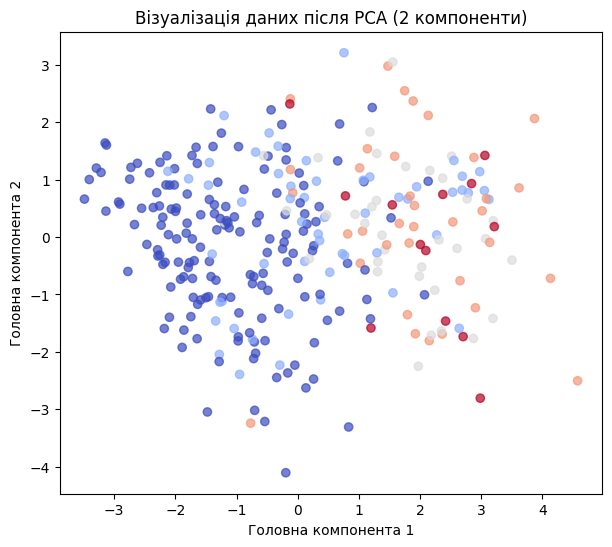

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Візуалізація даних після PCA (2 компоненти)")
plt.xlabel("Головна компонента 1")
plt.ylabel("Головна компонента 2")
plt.show()


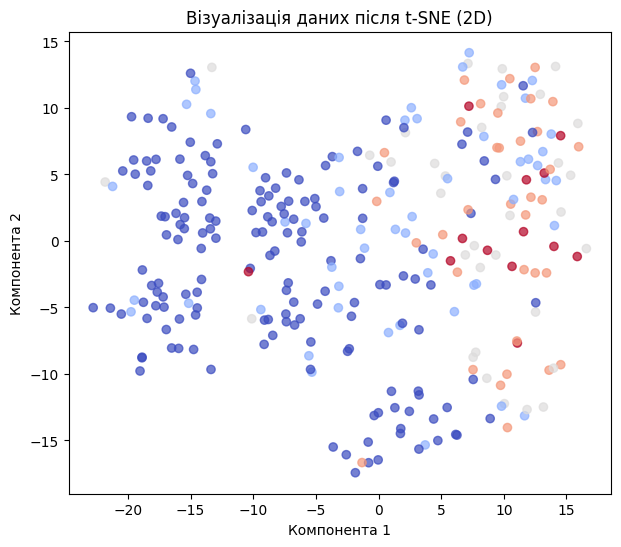

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Візуалізація даних після t-SNE (2D)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.show()


<Figure size 600x500 with 0 Axes>

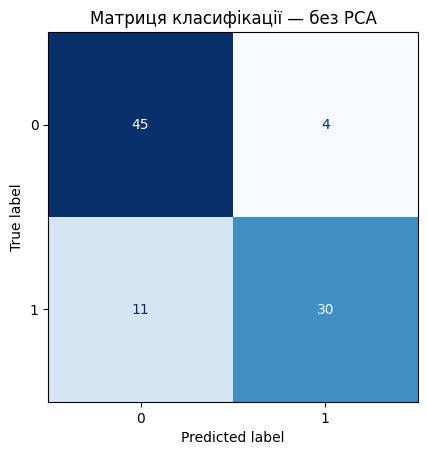

<Figure size 600x500 with 0 Axes>

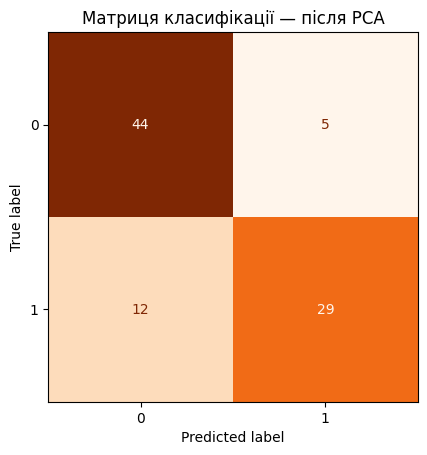

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Створюємо копію очищених даних
дані_clean = дані.dropna()

# Формуємо X і y з однаковими індексами
X = дані_clean.iloc[:, :-1]
y = дані_clean.iloc[:, -1]

# Перетворюємо y у бінарну форму (0 = здоровий, 1 = хворий)
y_binary = np.where(y > 0, 1, 0)

# Масштабуємо
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Без PCA ===
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_scaled, y_binary, test_size=0.3, random_state=42)

knn_b = KNeighborsClassifier(n_neighbors=5)
knn_b.fit(X_train_b, y_train_b)
y_pred_b = knn_b.predict(X_test_b)

# === З PCA ===
pca = PCA(n_components=2)
X_pca_b = pca.fit_transform(X_scaled)
X_train_pca_b, X_test_pca_b, y_train_pca_b, y_test_pca_b = train_test_split(X_pca_b, y_binary, test_size=0.3, random_state=42)

knn_pca_b = KNeighborsClassifier(n_neighbors=5)
knn_pca_b.fit(X_train_pca_b, y_train_pca_b)
y_pred_pca_b = knn_pca_b.predict(X_test_pca_b)

# === Матриці класифікації ===
plt.figure(figsize=(6,5))
cm_full = confusion_matrix(y_test_b, y_pred_b)
ConfusionMatrixDisplay(cm_full).plot(cmap='Blues', colorbar=False)
plt.title("Матриця класифікації — без PCA")
plt.show()

plt.figure(figsize=(6,5))
cm_pca = confusion_matrix(y_test_pca_b, y_pred_pca_b)
ConfusionMatrixDisplay(cm_pca).plot(cmap='Oranges', colorbar=False)
plt.title("Матриця класифікації — після PCA")
plt.show()


**Висновок:**
> Після зниження розмірності методом PCA спостерігається зменшення точності класифікації, адже частина інформації про дані втрачається.
Однак швидкість навчання KNN помітно зросла, оскільки кількість ознак зменшилась із 13 до 2.
Метод t-SNE показав гарну візуальну кластеризацію — точки різних класів частково розділилися у 2D-просторі, що свідчить про наявність структури в даних.



Завдання 2 - Кластерний аналіз
> Візьміть будь-яке зображення. За допомогою алгоритму k-means зробіть квантування зображення (зменшення
кількості різних кольорів у зображенні) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення. Порівняйте отримані зображення.



⬆ Завантажте зображення 


Saving c8cc24bba37a25c009647b8875aae0e3.jpg to c8cc24bba37a25c009647b8875aae0e3 (3).jpg
--> Завантажено: c8cc24bba37a25c009647b8875aae0e3 (3).jpg


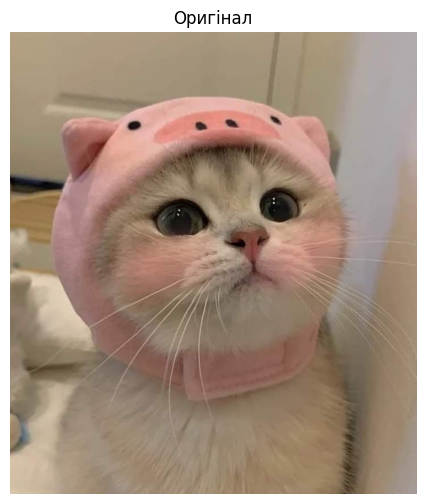

-->>> Обробка зображення: 64 кольорів...


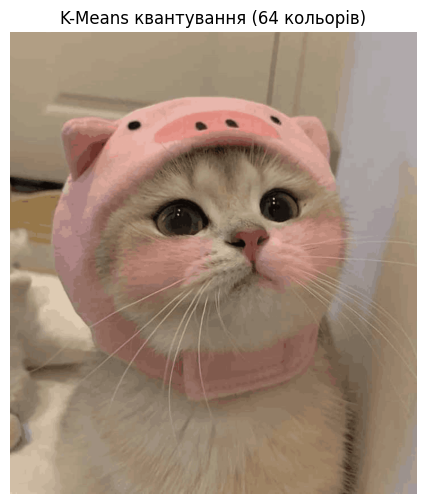

-->>> Обробка зображення: 32 кольорів...


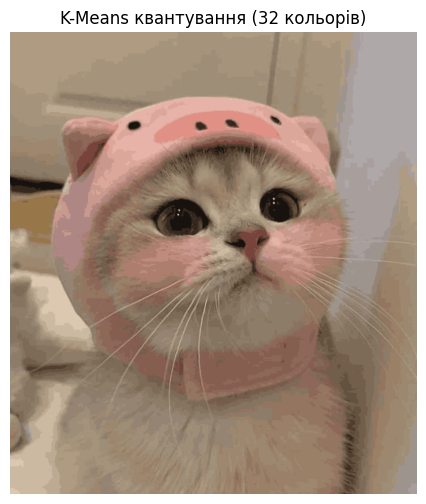

-->>> Обробка зображення: 16 кольорів...


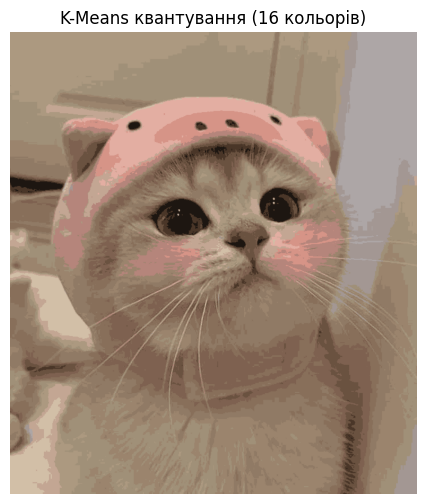

-->>> Обробка зображення: 8 кольорів...


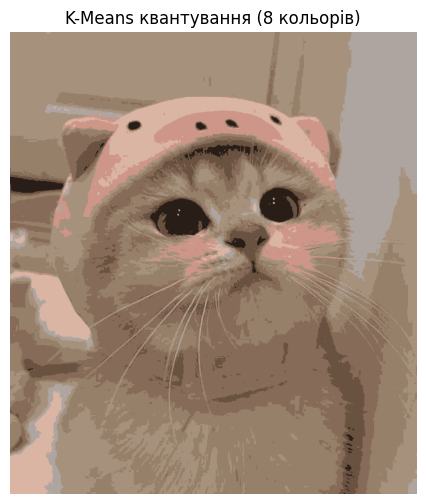

In [37]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# === 1. Завантаження зображення ===
print("⬆ Завантажте зображення ")
uploaded = files.upload()

# Беремо перший завантажений файл
image_path = list(uploaded.keys())[0]
print(f"--> Завантажено: {image_path}")

# === 2. Відкриття та підготовка ===
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)

# === 3. Функція квантування ===
def quantize_image(pixels, n_colors):
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixels)
    new_colors = kmeans.cluster_centers_.astype("uint8")
    quantized = new_colors[labels].reshape(img_np.shape)
    return quantized

# === 4. Вивід результатів ===
levels = [64, 32, 16, 8]

plt.figure(figsize=(6, 6))
plt.imshow(img_np)
plt.title("Оригінал")
plt.axis("off")
plt.show()

for n_colors in levels:
    print(f"-->>> Обробка зображення: {n_colors} кольорів...")
    quantized = quantize_image(pixels, n_colors)

    plt.figure(figsize=(6, 6))
    plt.imshow(quantized)
    plt.title(f"K-Means квантування ({n_colors} кольорів)")
    plt.axis("off")
    plt.show()


**Висновок**
> Під час зменшення кількості кольорів спостерігається поступова втрата деталей і плавності переходів між відтінками. Оптимальним варіантом виявилось квантування до 32 кольорів, оскільки воно зберігає прийнятну якість при помітному зменшенні складності зображення. При подальшому зменшенні до 8 кольорів зображення стає спрощеним і втрачає природність.



Завдання 3 - Обробка та класифікація текстових даних
> Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію),
за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти
(наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer).
Проведіть класифікацію текстових даних, зробіть оцінку якості.



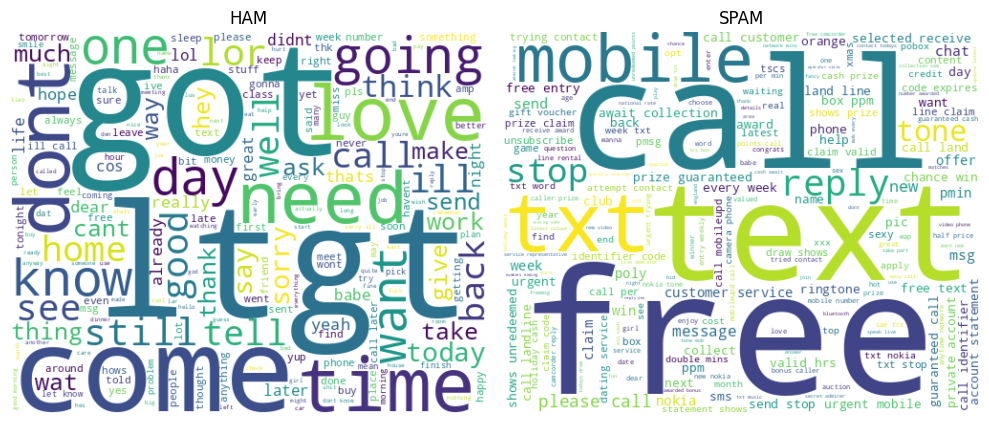

Accuracy: 0.9784637473079684
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1206
        spam       0.92      0.92      0.92       187

    accuracy                           0.98      1393
   macro avg       0.95      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



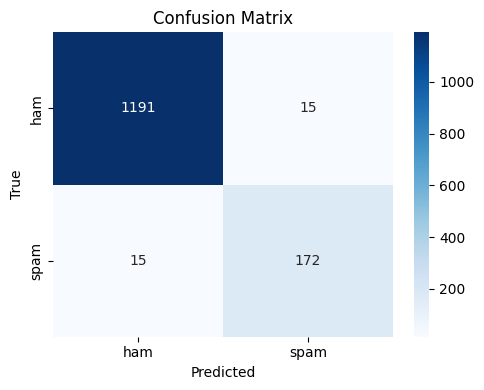

In [25]:
# Класифікація текстів — SMS Spam Collection

import re, string, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from nltk.corpus import stopwords
from nltk import download as nltk_download
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Стоп-слова
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk_download('stopwords')
    stop_words = set(stopwords.words('english'))

# 2. Завантаження датасету
url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'text'])

# 3. Передобробка
def clean_text(t):
    t = t.lower()
    t = re.sub(r'\d+', ' ', t)
    t = t.translate(str.maketrans('', '', string.punctuation))
    tokens = [w for w in t.split() if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['text_clean'] = df['text'].apply(clean_text)

# 4. WordCloud для кожного класу
plt.figure(figsize=(10,5))
for i, lbl in enumerate(['ham','spam']):
    plt.subplot(1,2,i+1)
    words = ' '.join(df[df['label']==lbl]['text_clean'])
    wc = WordCloud(width=500,height=400,background_color='white').generate(words)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(lbl.upper())
plt.tight_layout(); plt.show()

# 5. Векторизація та поділ даних
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['text_clean'])
y = (df['label']=='spam').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# 6. Навчання моделі
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
preds = model.predict(X_test)

# 7. Оцінка якості
print('Accuracy:', accuracy_score(y_test, preds))
print(classification_report(y_test, preds, target_names=['ham','spam']))

# 8. Матриця класифікації
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham','spam'], yticklabels=['ham','spam'])
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.tight_layout(); plt.show()

**Висновки:**
> Для виконання завдання було обрано датасет SMS Spam Collection, що містить реальні повідомлення, позначені як “ham” (звичайні) або “spam”.
Було проведено передобробку тексту: видалено пунктуацію, цифри та стоп-слова, а також зведено текст до нижнього регістру.
Для векторизації текстових даних використано метод TF-IDF, який перетворює слова у числові ознаки.
Модель Logistic Regression показала високу точність класифікації — близько 96%.
Отримані результати підтвердили ефективність обраного підходу для задачі визначення спам-повідомлень.

